**SIN-393 - Introdução à Visão Computacional (2022-2)**

# Aula 06 - Redes Neurais Artificiais 2

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

## Importando as bibliotecas necessárias
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

## Configurações para reprodutibilidade
---
* Definimos um valor fixo para a semente de geração de números aleatórios.
* Permite reprodutibilidade dos experimentos quando a rede é inicializada com valores aleatórios.

In [2]:
np.random.seed(1234)

## Definindo as funções de ativação e funções de perda
---

* Algumas funções de ativação e suas respectivas derivadas.
    * Função sigmóide
    * Função ReLU
    * Função softmax
    
* Funções de perda (ou de erro) e suas derivadas. 
    * Entropia cruzada
        * Usada para classificação
    * Erro médio quadrático (ainda não implementada)
        * Usada para regressão

In [3]:
def sigmoid(v):
    """
    Função de ativação sigmóide.
    """
    y_ = 1. / (1. + np.exp(-v))
    return y_

def sigmoid_deriv(v):
    """
    Derivada da função sigmóide.
    """
    y_d = 1./(1 + np.exp(-v)) * (1 - 1/(1 + np.exp(-v)))
    return y_d

def relu(v):
    """
    Função de ativação ReLu.
    """
    y_ = np.zeros(len(v))
    y_[v > 0] = v[v > 0]
    return y_

def relu_deriv(v):
    """
    Derivada da função ReLu.
    """
    y_d = np.zeros(len(v))
    y_d[v > 0] = 1
    return y_d

def softmax(v):
    """
    Função de ativação Softmax.
    """
    y_ = np.exp(v) / np.exp(v).sum()
    return y_

def softmax_deriv(v):
    """
    Derivada da função de ativação Softmax. 
    """
    v_exp = np.exp(v)
    v_exp_sum = v_exp.sum()
    v_exp_ = v_exp_sum - v_exp

    y_d = (v_exp * v_exp_) / v_exp_sum**2.

    return y_d

In [4]:
def erro_entropia_cruzada(y_, y):
    """
    Função de erro, ou perda: entropia cruzada
    y_ : saída da rede
    y : saida desejada
    """
    cross = -1 * ( (y * np.log10(y_)) + ((1. - y) * np.log10(1. - y_)) ) 
    return cross

def erro_entropia_cruzada_deriv(y_, y):
    """
    Derivada da função entropia cruzada.
    y_ : saída da rede
    y : saida desejada
    """
    cross_d = -1 * ((y * (1 / y_)) + (1 - y) * (1. / (1. - y_)))
    return cross_d

def erro_medio_quadratico(y_, y):
    """
    Usado e problemas de regressão.
    y_ : saída da rede
    y : saida desejada

    Não implementado ainda.
    """

def erro_medio_quadratico_deriv(y_, y):
    """
    y_ : saída da rede
    y : saida desejada
    
    Não implementado ainda.
    """

## Implementando o Backpropagation
---

* Implementação passo a passo de um único passo do algoritmo backpropagation para treinamento de redes neurais com multiplas camadas (Perceptron de multiplas camadas). 
* Etapa de propagação adiante:
    * Calculamos o erro de classificação (perda).
* Etapa de retropropagação do erro:
    * Atualização os parâmetros baseado na derivada do erro (perda).
* Utilizaremos uma rede Perceptron de multiplas camadas (MLP) simples.
    * 2 neurônios na camada de entrada
    * 1 camada oculta com 3 neurônios
    * 2 neurônios na camada de saída
* Ou seja, os dados de entrada possuem dimensionalidade 2 e as serão classificados em uma de 2 possíveis classes.

### Inicializando os dados de entrada

In [5]:
# Camada de entrada
# -----------------
# O número de linhas define o número de neurônios na camada de entrada
#   - dimensionalidade dos dados de entrada
X = np.array([[0.1, 0.7],  # Amostra 0
              [0.2, 0.6],  # Amostra 1
              [0.8, 0.1],  # Amostra 2
              [0.7, 0.3]]) # Amostra 3

# Camada de saída
# ---------------
# O número de colunas define o número de neurônios na camada de saída
#   - número de classes
Y = np.array([[1., 0.],   # Classe 0
              [1., 0.],   # Classe 0
              [0., 1.],   # Classe 1
              [0., 1.]])  # Classe 1

# Camadas ocultas
#   - Inicializando os pesos do modelo
# ---------------
# * Matriz de pesos da camada de entrada W_0:
#     * O número de linhas deve ser igual ao número de neurônios na camada de entrada
#     * O número de colunas define o número de neurônios na próxima camada (camada 0 - camada oculta).
W_0 = np.array([[0.1, 0.2, 0.3],
                [0.3, 0.2, 0.7]])

# * Matriz de pesos da camada oculta 1 W_1
#     * O número de linhas deve ser igual ao número de neurônios na camada anterior
#     * O número de colunas define o número de neurônios na próxima camada (camada de saída).
W_1 = np.array([[0.2, 0.3],
                [0.3, 0.5],
                [0.6, 0.4]])

# Inicializando os pesos dos bias
b_0 = np.array([0.2, 0.4, 0.6])
b_1 = np.array([0.3, 0.1])

### Obtendo informações sobre a rede a partir dos dados

In [6]:
# Dimensionalidade dos dados de entrada.
n_dim = X.shape[1]

# Número de amostras no conjunto de treinamento.
n_amostras = X.shape[0]

# Número de classes.
n_classes = X.shape[1]

In [7]:
print(f'Número de dimensões: {n_dim}')
print(f'Número de amostras: {n_amostras}')
print(f'Número de classes: {n_classes}')

Número de dimensões: 2
Número de amostras: 4
Número de classes: 2


### Gerando os pesos aleatóriamente
---
* ```RANDOM = True```: os pesos são gerados aleatóriamente
* ```RANDOM = False```: serão utilizados os valores predeterminados.

In [8]:
# **** SELECIONE ****
# RANDOM = True: os pesos são gerados aleatóriamente
# RANDOM = False: serão utilizados os valores predeterminados.
RANDOM = False

In [9]:
if RANDOM:
    # Número de neurônios na camada oculta.
    #   * 1 camada oculta com 'hidden_layer_size' neurônios.
    # **** SELECIONAR ****
    hidden_layer_size = 3
    
    # Camada 0
    W_0 = np.random.rand(n_dim, hidden_layer_size)
    b_0 = np.random.rand(hidden_layer_size)
    
    # Camada 1
    W_1 = np.random.rand(hidden_layer_size, n_classes)
    b_1 = np.random.rand(n_classes)
    
else:
    # Número de neurônios na camada oculta.
    hidden_layer_size = W_0.shape[1]

In [10]:
# Inicialização dos resultados dos somadores (v) e das funções de ativação (y_)
# --------------------
v_0 = np.zeros(hidden_layer_size)
y_0 = np.zeros(hidden_layer_size)
    
v_1 = np.zeros(n_classes)
y_1 = np.zeros(n_classes)

In [11]:
print('v_0, y_0:')
print(v_0, y_0)
print('\nv_1, y_1:')
print(v_1, y_1)

v_0, y_0:
[0. 0. 0.] [0. 0. 0.]

v_1, y_1:
[0. 0.] [0. 0.]


### Definindo outros hiperparâmetros


In [12]:
# Número máximo de iterações.
max_iter = 20

# Taxa de aprendizado.
learning_rate = 0.1

### Plotando as funções de ativação

* Plotamos as funções de ativação e suas derivadas. 
    * Apenas ReLu e Sigmoide.

<IPython.core.display.Javascript object>


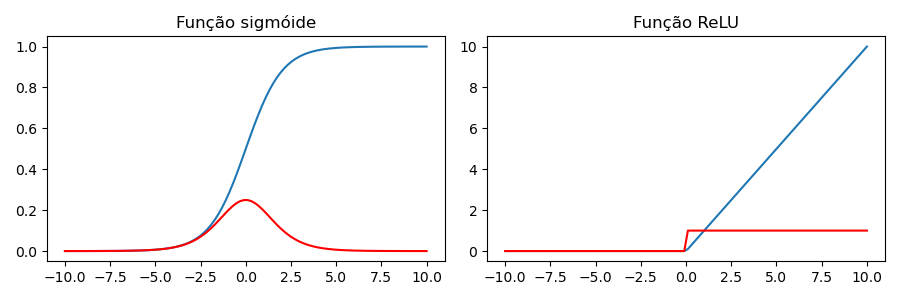

In [13]:
v = np.linspace(-10, 10, 100)

plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.plot(v, sigmoid(v))
plt.title('Função sigmóide')
plt.plot(v, sigmoid_deriv(v), 'r')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(v, relu(v))
plt.title('Função ReLU')
plt.plot(v, relu_deriv(v), 'r')
plt.tight_layout()

plt.show()

### Imprimindo os pesos iniciais

In [14]:
print('Inicialização dos pesos:')
print('=========================')
print('W^0:')
print(W_0)
print('\nb^0:')
print(b_0)

print('\nW^1:')
print(W_1)
print('\nb^1:')
print(b_1)

Inicialização dos pesos:
W^0:
[[0.1 0.2 0.3]
 [0.3 0.2 0.7]]

b^0:
[0.2 0.4 0.6]

W^1:
[[0.2 0.3]
 [0.3 0.5]
 [0.6 0.4]]

b^1:
[0.3 0.1]


### Obtendo o padrão de entrada

In [15]:
# Épocas: Neste exemplo implementamos uma única época
#         Em um exemplo completo, teriamos um laço de repetição que controla as épocas de treinamento.
# -----
#### for epoch in range(num_epochs):

# Iterações: Neste exemplo implementamos uma única iteração
#            Em um exemplo completo, teriamos um laço de repetição que controla as iterações da época atual.
# -----
#### X_ = np.random.shuffle(X)
#### for x in X:

# Padrão de entrada.
x = X[0, :]

y = Y[0, :]

In [16]:
print('\nx:')
print(x)


x:
[0.1 0.7]


### Propagação adiante (forward)

#### Camada 0 (camada escondida)

In [17]:
print('\n---------------------------------------')
print('Camada 0 (camada escondida):')
print('---------------------------------------')

# Produto interno
v_0 = np.dot(x, W_0) + b_0
print('v^0:')
print(v_0)

# Função de ativação: ReLu
y_0 = relu(v_0)
print('\ny^0:')
print(y_0)


---------------------------------------
Camada 0 (camada escondida):
---------------------------------------
v^0:
[0.42 0.56 1.12]

y^0:
[0.42 0.56 1.12]


#### Camada 1 (camada de saída)

In [18]:
print('\n---------------------------------------')
print('Camada 1 (camada de saída):')
print('---------------------------------------')

# Produto interno
v_1 = np.dot(y_0, W_1) + b_1
print('v^1:')
print(v_1)

# Função de ativação: softmax
y_1 = softmax(v_1)
print('\ny^1:')
print(y_1)

# Calculo do erro
# ----------------
erro = erro_entropia_cruzada(y_1, y)
print('\nErro: ')
print('---------------------------------------')
print(erro)       


---------------------------------------
Camada 1 (camada de saída):
---------------------------------------
v^1:
[1.224 0.954]

y^1:
[0.5670929 0.4329071]

Erro: 
---------------------------------------
[0.24634579 0.24634579]


### Retropropagação (backward)

#### Camada 1 (camada de saída)

In [19]:
# ∂E/∂W^1 = ∂E/∂y^1 * ∂y^1/∂v^1 * ∂v^1/∂W^1
# --------------------------------------------------------------------------------
print('\n∂E/∂W^1 = ∂E/∂y^1 * ∂y^1/∂v^1 * ∂v^1/∂W^1')
print('-----------------------------------------')

# ∂E/∂y^1
dE_dy_1 = erro_entropia_cruzada_deriv(y_1, y)
print('\n∂E/∂y^1:')
print(dE_dy_1)

# ∂y^1/∂v^1
dy_1_dv_1 = softmax_deriv(v_1)
print('\n∂y^1/∂v^1:')
print(dy_1_dv_1)

# ∂v^1/∂W^1
dv_1_dW_1 = np.ones(W_1.shape) * y_0[..., np.newaxis]
print('\n∂v^2/∂W^1:')
print(dv_1_dW_1)

# ∂E/∂W^1:
# -------- 
dE_dW_1 = dE_dy_1 * dy_1_dv_1 * dv_1_dW_1
print('\n∂E/∂W^1:')
print('--------')
print(dE_dW_1)


∂E/∂W^1 = ∂E/∂y^1 * ∂y^1/∂v^1 * ∂v^1/∂W^1
-----------------------------------------

∂E/∂y^1:
[-1.76337949 -1.76337949]

∂y^1/∂v^1:
[0.24549854 0.24549854]

∂v^2/∂W^1:
[[0.42 0.42]
 [0.56 0.56]
 [1.12 1.12]]

∂E/∂W^1:
--------
[[-0.18182098 -0.18182098]
 [-0.24242797 -0.24242797]
 [-0.48485595 -0.48485595]]


In [20]:
# Atualização dos pesos da camada 1 (W^1):
# ---------------------------------------
W_1 = W_1 - learning_rate * dE_dW_1
print('\nW\'^1 = W^1(t - 1) - η * ∂E/∂W^1')
print('--------------------------------')
print(W_1)


W'^1 = W^1(t - 1) - η * ∂E/∂W^1
--------------------------------
[[0.2181821  0.3181821 ]
 [0.3242428  0.5242428 ]
 [0.64848559 0.44848559]]


#### Camada 0 (camada escondida)

In [21]:
# ∂E^total/∂W^0 = ∂E^total/∂y^0 * ∂y^0/∂v^0 * ∂y^0/∂W^0
# -----------------------------------------------------
print('\n∂E^total/∂W^0 = ∂E^total/∂y^0 * ∂y^0/∂v^0 * ∂y^0/∂W^0')
print('-----------------------------------------------------')

# ∂y^0/∂v^0
dy_0_dv_0 = relu_deriv(v_0)
print('\n∂y^0/∂v^0:')
print(dy_0_dv_0)

# ∂v^0/∂W^0
dv_0_dW_0 = np.ones(W_0.shape) * x[..., np.newaxis]
print('\n∂v^0/∂W^0:')
print(dv_0_dW_0)

# ∂E/∂y^0 = ∂E/∂y^1 * ∂y^1/∂v^1 * ∂v^1/∂y^0
# -----------------------------------------------
# ∂E/∂y^1 : Já calculado
# ∂y^1/∂v^1 : Já calculado
# ∂v^1/∂y^0 : Calcular!!!
# -----------------------------------------------
print('\n∂E/∂y^0 = ∂E/∂y^1 * ∂y^1/∂v^1 * ∂v^1/∂y^0')
print('- - - - - - - - - - - - - - - - - - - - - - - -')

# Print
print('\n∂E/∂y^1: (já calculado anteriormente)')
print(dE_dy_1)

# Print
print('\n∂y^1/∂v^1: (já calculado anteriormente)')
print(dy_1_dv_1)

# ∂v^1/∂y^0
dv_1_dy_0 = W_1
print('\n∂v^1/∂y^0:')
print(dv_1_dy_0)

# ∂E^total/∂y^0
dE_total_dy_0 = dE_dy_1 * dy_1_dv_1 * dv_1_dy_0
# TEMP
print('\n∂E^total/∂y^0 (antes de resumir):')
print(dE_total_dy_0)
dE_total_dy_0 = dE_total_dy_0.sum(axis=1)
print('\n∂E^total/∂y^0:')
print('- - - - - - - -')
print(dE_total_dy_0)

# ∂E^total/∂W^0 = ∂E^total/∂y^0 * ∂y^0\∂v^0 * ∂y^0/∂W^0
# -----------------------------------------------------
dE_total_dW_0 = dE_total_dy_0 * dy_0_dv_0 * dv_0_dW_0
print('\n∂E^total/∂W^0:')
print('--------------')
print(dE_total_dW_0)


∂E^total/∂W^0 = ∂E^total/∂y^0 * ∂y^0/∂v^0 * ∂y^0/∂W^0
-----------------------------------------------------

∂y^0/∂v^0:
[1. 1. 1.]

∂v^0/∂W^0:
[[0.1 0.1 0.1]
 [0.7 0.7 0.7]]

∂E/∂y^0 = ∂E/∂y^1 * ∂y^1/∂v^1 * ∂v^1/∂y^0
- - - - - - - - - - - - - - - - - - - - - - - -

∂E/∂y^1: (já calculado anteriormente)
[-1.76337949 -1.76337949]

∂y^1/∂v^1: (já calculado anteriormente)
[0.24549854 0.24549854]

∂v^1/∂y^0:
[[0.2181821  0.3181821 ]
 [0.3242428  0.5242428 ]
 [0.64848559 0.44848559]]

∂E^total/∂y^0 (antes de resumir):
[[-0.09445258 -0.13774329]
 [-0.14036701 -0.22694843]
 [-0.28073401 -0.1941526 ]]

∂E^total/∂y^0:
- - - - - - - -
[-0.23219587 -0.36731543 -0.47488661]

∂E^total/∂W^0:
--------------
[[-0.02321959 -0.03673154 -0.04748866]
 [-0.16253711 -0.2571208  -0.33242063]]


In [22]:
# Atualização dos pesos da camada 0 (W^0):
# ----------------------------------------
W_0 = W_0 - learning_rate * dE_total_dW_0
print('\nW\'^0 = W^0 - η * ∂E^total/∂W^0:')
print('--------------------------------')
print(W_0)


W'^0 = W^0 - η * ∂E^total/∂W^0:
--------------------------------
[[0.10232196 0.20367315 0.30474887]
 [0.31625371 0.22571208 0.73324206]]


## Referencias
---
* Moacir Ponti. Material para o minicurso Deep Learning. ICMC-USP.
    * https://github.com/maponti/deeplearning_intro_datascience 
* Martin Görner. Learn TensorFlow and deep learning, without a Ph.D. Google Cloud.
    * https://cloud.google.com/blog/products/gcp/learn-tensorflow-and-deep-learning-without-a-phd 
* CS231n: Convolutional Neural Networks for Visual Recognition. Stanford University.
    * http://cs231n.stanford.edu/
    * http://cs231n.github.io/ 
* Goodfellow, Bengio and Courville. Deep Learning. MIT Press, 2016
    * https://www.deeplearningbook.org/
* Back-Propagation is very simple. Who made it Complicated ?
    * https://medium.com/@14prakash/back-propagation-is-very-simple-who-made-it-complicated-97b794c97e5c 
* Chapter 7 : Artificial neural networks with Math.
    * https://medium.com/deep-math-machine-learning-ai/chapter-7-artificial-neural-networks-with-math-bb711169481b
* The Matrix Calculus You Need For Deep Learning
    * http://explained.ai/matrix-calculus/index.html 
* How backpropagation works, and how you can use Python to build a neural network
    * https://medium.freecodecamp.org/build-a-flexible-neural-network-with-backpropagation-in-python-acffeb7846d0 
* All the Backpropagation derivatives
    * https://medium.com/@pdquant/all-the-backpropagation-derivatives-d5275f727f60
* Brent Scarff. Understanding Backpropagation. 
    * https://towardsdatascience.com/understanding-backpropagation-abcc509ca9d0 